ANÁLISIS EDA CON VISUALIZACIONES

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [248]:
df_limpio = pd.read_csv("C:/Users/Administrador/Desktop/RCM/Proyecto2-EDA-Ingresos-Publicos-Brasil/datos/concatenado_limpio.csv")

In [249]:
df_limpio.head()

,NOMBRE ÓRGANO SUPERIOR,NOMBRE ÓRGANO,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN DE INGRESO,TIPO DE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO EJERCICIO
0,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,31/12/2013,2013
1,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,31/12/2013,2013
2,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,0.0,31/12/2013,2013
3,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,0.0,31/12/2013,2013
4,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,0.0,31/12/2013,2013


Comenzamos calculando la distribunción de ingresos por categoria

In [250]:
distribucion_ingresos = df_limpio.groupby('CATEGORÍA ECONÓMICA').agg({'VALOR REALIZADO': 'sum','VALOR PREVISTO ACTUALIZADO': 'sum'}).reset_index()
# Calculamos el porcentaje de cada categoría en los ingresos totales
distribucion_ingresos['Porcentaje_Valor_Realizado'] = (distribucion_ingresos['VALOR REALIZADO'] / distribucion_ingresos['VALOR REALIZADO'].sum()) * 100
distribucion_ingresos['Porcentaje_Valor_Previsto'] = (distribucion_ingresos['VALOR PREVISTO ACTUALIZADO'] / distribucion_ingresos['VALOR PREVISTO ACTUALIZADO'].sum()) * 100

distribucion_ingresos


,CATEGORÍA ECONÓMICA,VALOR REALIZADO,VALOR PREVISTO ACTUALIZADO,Porcentaje_Valor_Realizado,Porcentaje_Valor_Previsto
0,Receitas Correntes,1.135448e+13,1.256245e+13,4.903515e+01,49.123285
1,Receitas Correntes - intra-orçamentárias,2.684376e+11,2.686059e+11,1.159268e+00,1.050337
2,Receitas de Capital,1.151280e+13,1.273145e+13,4.971889e+01,49.784113
3,Receitas de Capital - intra-orçamentárias,2.007285e+10,1.080841e+10,8.668608e-02,0.042264
4,Sem informação,3.030307e+04,0.000000e+00,1.308660e-07,0.000000


Esta distribución sugiere que ambas categorías principales (Correntes y Capital) tienen una contribución bastante equilibrada en el total de ingresos previstos y realizados.

Mientras que las otras categorías tienen un peso casi insignificante

Calculamos ahora la diferencia y la diferencia promedio entre ingresos previstos y realizados

In [251]:
distribucion_ingresos['Diferencia_Previsto_Realizado'] = distribucion_ingresos['VALOR PREVISTO ACTUALIZADO'] - distribucion_ingresos['VALOR REALIZADO']
diferencia_promedio = distribucion_ingresos[['CATEGORÍA ECONÓMICA', 'Diferencia_Previsto_Realizado']]
diferencia_promedio


,CATEGORÍA ECONÓMICA,Diferencia_Previsto_Realizado
0,Receitas Correntes,1.207976e+12
1,Receitas Correntes - intra-orçamentárias,1.683030e+08
2,Receitas de Capital,1.218646e+12
3,Receitas de Capital - intra-orçamentárias,-9.264437e+09
4,Sem informação,-3.030307e+04


Las dos categorías principales presentas una diferencia aproximada de 1.21 millones lo que sugiere que en ambas hubo una subejecucción de ingresos con respecto a lo previsto (se ejecutaron menos ingresos de los previstos).

Para el análisis temporal, evaluaremos las tendencias de los ingresos realizados y previstos a lo largo del tiempo. Empezaremos con un análisis anual de las tendencias de ingresos.



In [252]:
# Agrupamos (con un groupby) por año y calculamos la suma de ingresos previstos y realizados
ingresos_por_anio = df_limpio.groupby('AÑO EJERCICIO').agg({
    'VALOR REALIZADO': 'sum',
    'VALOR PREVISTO ACTUALIZADO': 'sum'
}).reset_index()

ingresos_por_anio




,AÑO EJERCICIO,VALOR REALIZADO,VALOR PREVISTO ACTUALIZADO
0,2013,1.607763e+12,2.071914e+12
1,2014,2.133634e+12,2.248284e+12
2,2015,2.601736e+12,2.809879e+12
3,2016,2.528012e+12,2.755497e+12
4,2017,2.200378e+12,2.427185e+12
5,2018,2.671546e+12,3.335790e+12
6,2019,2.697940e+12,3.024303e+12
7,2020,3.156872e+12,2.887547e+12
8,2021,3.557911e+12,4.012919e+12


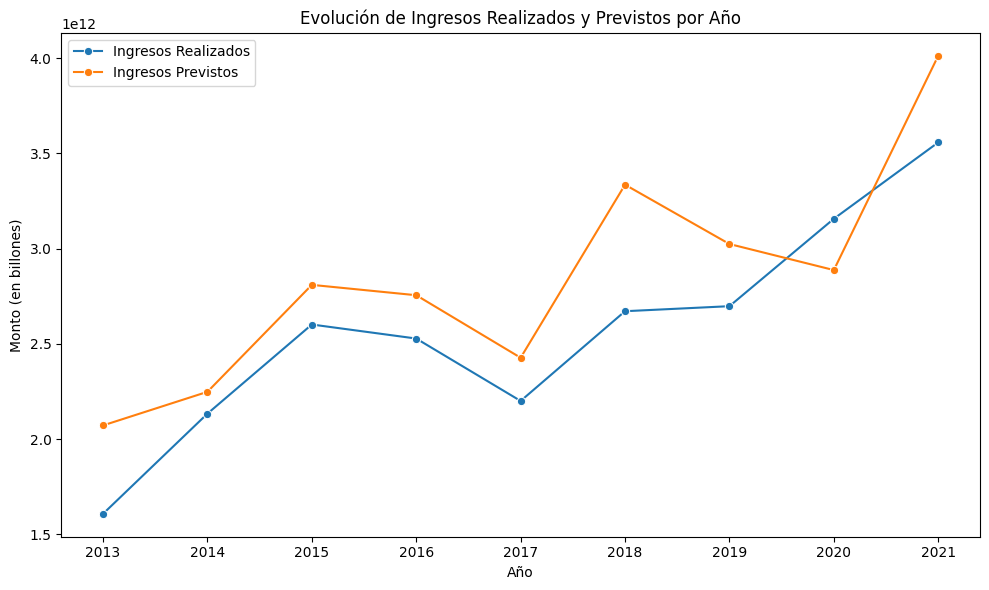

In [253]:
# Grafico de lineas de la evolución de los ingresos realizados y previstos por año
plt.figure(figsize=(10,6))

sns.lineplot(x='AÑO EJERCICIO', y='VALOR REALIZADO', data=ingresos_por_anio, label='Ingresos Realizados', marker='o', palette="set2")
sns.lineplot(x='AÑO EJERCICIO', y='VALOR PREVISTO ACTUALIZADO', data=ingresos_por_anio, label='Ingresos Previstos', marker='o', palette= "set2")

plt.title('Evolución de Ingresos Realizados y Previstos por Año')
plt.xlabel('Año')
plt.ylabel('Monto (en billones)')

plt.legend()
plt.tight_layout();
plt.show()



Vemos que solo en 2020 los Ingresos realizados superan a los previstos, lo que viene a confirmar la subejecución de ingresos que sospechabamos

No obstante vamos a profundizar más analizando la evolución mes a mes

In [254]:
# Extramos el mes de la columna "FECHA DE LANZAMIENTO"
df_limpio['FECHA DE LANZAMIENTO'] = pd.to_datetime(df_limpio['FECHA DE LANZAMIENTO'], errors='coerce')
df_limpio['MES'] = df_limpio['FECHA DE LANZAMIENTO'].dt.month
# Agrupamos por mes y calcular la suma de ingresos previstos y realizados
ingresos_por_mes = df_limpio.groupby('MES').agg({
    'VALOR REALIZADO': 'sum',
    'VALOR PREVISTO ACTUALIZADO': 'sum'
}).reset_index()
ingresos_por_mes


,MES,VALOR REALIZADO,VALOR PREVISTO ACTUALIZADO
0,1.0,1.652328e+12,1.430670e+13
1,2.0,9.865281e+11,0.000000e+00
2,3.0,1.482890e+12,-4.947122e+07
3,4.0,1.466777e+12,3.932866e+12
4,5.0,1.133911e+12,0.000000e+00
5,6.0,1.073760e+12,4.983888e+07
6,7.0,1.434073e+12,9.923152e+07
7,8.0,1.525289e+12,4.363775e+07
8,9.0,1.663797e+12,0.000000e+00
9,10.0,1.465253e+12,4.758073e+07


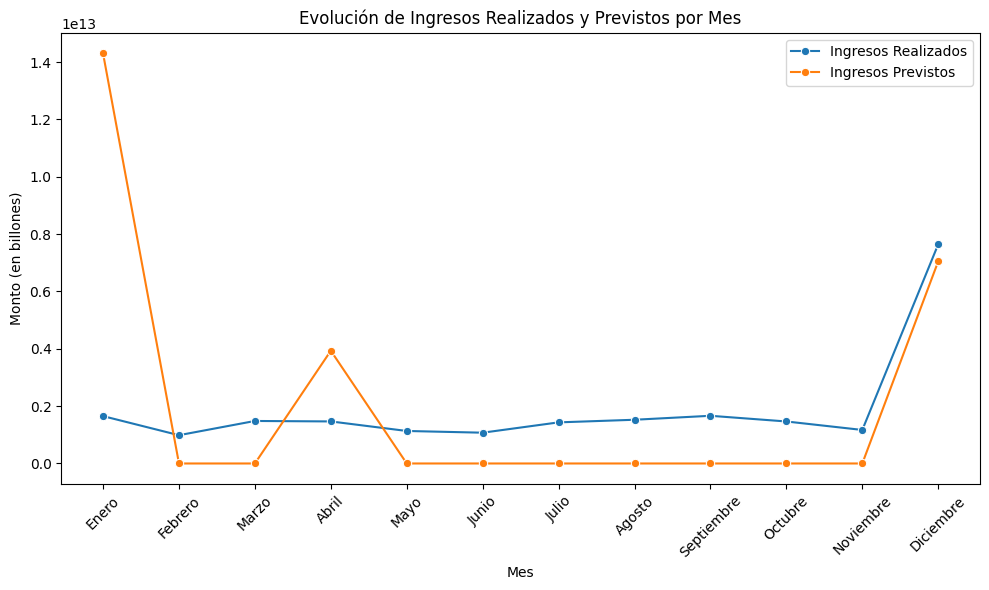

In [255]:
# Grafico de lineas de la evolución de los ingresos realizados y previstos por mes
plt.figure(figsize=(10,6))
sns.lineplot(x='MES', y='VALOR REALIZADO', data=ingresos_por_mes, label='Ingresos Realizados', marker='o', palette="set2")
sns.lineplot(x='MES', y='VALOR PREVISTO ACTUALIZADO', data=ingresos_por_mes, label='Ingresos Previstos', marker='o', palette="set2")

plt.title('Evolución de Ingresos Realizados y Previstos por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto (en billones)')

plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45) 

# Mostrar leyenda, grid y ajustar el layout

plt.tight_layout()  # Ajustar automáticamente el layout
plt.show()


Observamos fluctuaiones entre meses, pero para tratar de ver si hay alguna tendencia o patron consolidado, vamos a hacer una comparativa entre los mismos meses en distintos años.

In [256]:
# Agrupamos por año y mes para comparar los ingresos por mes entre años
ingresos_por_mes_anio = df_limpio.groupby(['AÑO EJERCICIO', 'MES']).agg({
    'VALOR REALIZADO': 'sum',
    'VALOR PREVISTO ACTUALIZADO': 'sum'
}).reset_index()

ingresos_por_mes_anio

,AÑO EJERCICIO,MES,VALOR REALIZADO,VALOR PREVISTO ACTUALIZADO
0,2013,12.0,1.561605e+12,2.021946e+12
1,2014,12.0,2.115026e+12,2.228247e+12
2,2015,12.0,2.598018e+12,2.801856e+12
3,2016,1.0,2.206944e+11,2.754956e+12
4,2016,2.0,1.245952e+11,0.000000e+00
...,...,...,...,...
70,2021,8.0,1.533384e+11,0.000000e+00
71,2021,9.0,3.889765e+11,0.000000e+00
72,2021,10.0,3.621887e+11,0.000000e+00
73,2021,11.0,2.620856e+11,0.000000e+00


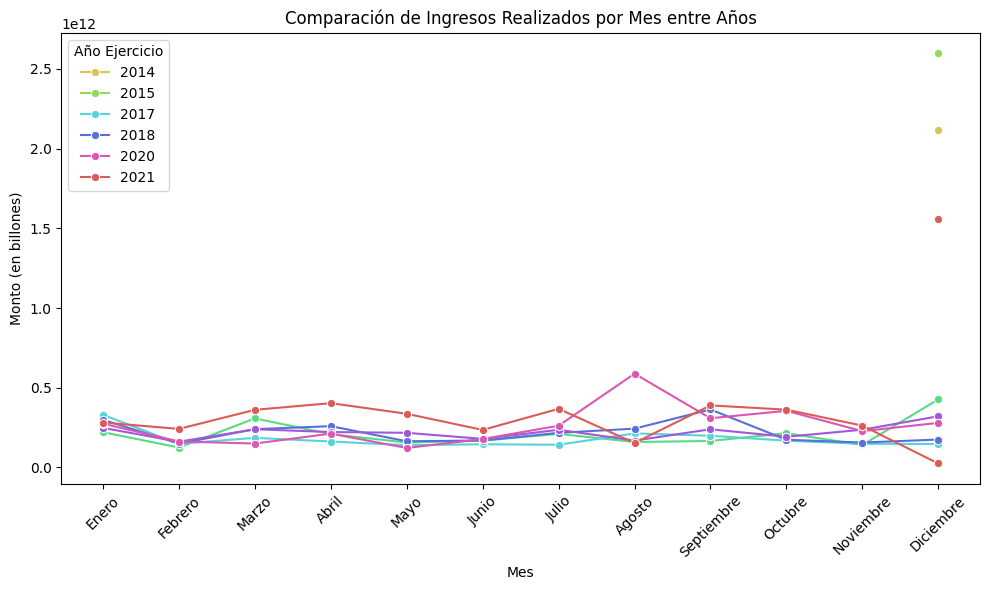

In [257]:
# Gráfico de líneas para los ingresos realizadospor mes, sparados por año
plt.figure(figsize=(10,6))

sns.lineplot(x='MES', y='VALOR REALIZADO', hue='AÑO EJERCICIO', data=ingresos_por_mes_anio, marker='o', palette="hls")
plt.title('Comparación de Ingresos Realizados por Mes entre Años')
plt.xlabel('Mes')
plt.ylabel('Monto (en billones)')

plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45) 
plt.legend(title='Año Ejercicio')
plt.tight_layout()  
plt.show()


Observamos que los Ingresos se disparan en Diciembre de los años 2014, 2015 y 2021.

A nostros nos interesa explorar de donde viene la discrepancia entre el total de Ingresos previstos y Realizados, así que vamos a analizar la diferenia entre Ingresos Previstos y Realizados por mes a lo largo de los diferentes años

In [258]:
ingresos_por_mes_anio['Diferencia_Previsto_Realizado'] = ingresos_por_mes_anio['VALOR PREVISTO ACTUALIZADO'] - ingresos_por_mes_anio['VALOR REALIZADO']


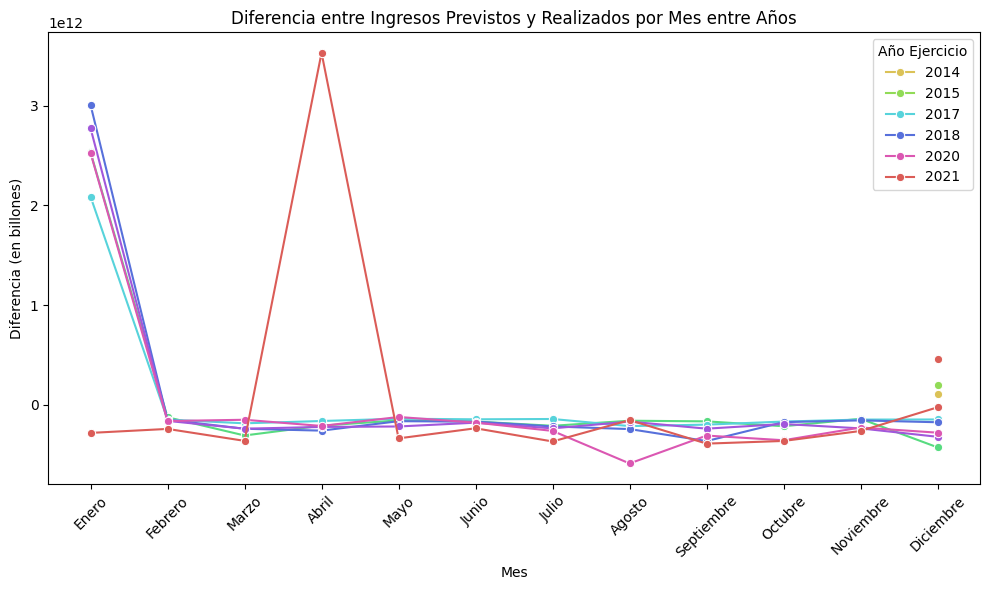

In [259]:
plt.figure(figsize=(10,6))

sns.lineplot(x='MES', y='Diferencia_Previsto_Realizado', hue='AÑO EJERCICIO', data=ingresos_por_mes_anio, marker='o', palette="hls")

plt.title('Diferencia entre Ingresos Previstos y Realizados por Mes entre Años')
plt.xlabel('Mes')
plt.ylabel('Diferencia (en billones)')

plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45) 

plt.legend(title='Año Ejercicio')
plt.tight_layout()  
plt.show()


Las diferencias más acusadas se dan en Abril de 2021, y sobre todo, en Enero de los años 2017, 2018, 2020 y 2021 lo que establecería un patrón de discrepancia entre los ingresos planeados y los llevados a cabo en el principio de año

Hemos visto las discrepancias entre categorías pero podemos profundizar más, viendo las discrepancias entre Tipos de Ingreso

In [260]:
# Agrupamos por la columna "TIPO DE INGRESO" y calculamos la diferencia entre ingresos previstos y realizados
diferencia_por_tipo_ingreso = df_limpio.groupby('TIPO DE INGRESO').agg({
    'VALOR PREVISTO ACTUALIZADO': 'sum',
    'VALOR REALIZADO': 'sum'
}).reset_index()

diferencia_por_tipo_ingreso['Diferencia_Previsto_Realizado'] = diferencia_por_tipo_ingreso['VALOR PREVISTO ACTUALIZADO'] - diferencia_por_tipo_ingreso['VALOR REALIZADO']

#Ordenamos de mayor a menor y sacamos los 10 primeros que serán los 10 con mayor diferencia
diferencias_ordenadas_mayor_a_menor = diferencia_por_tipo_ingreso.sort_values(by='Diferencia_Previsto_Realizado', ascending=False)
diferencias_ordenadas_menor_a_mayor = diferencia_por_tipo_ingreso.sort_values(by='Diferencia_Previsto_Realizado', ascending=True)


In [261]:
diferencias_ordenadas_mayor_a_menor.head(10)

,TIPO DE INGRESO,VALOR PREVISTO ACTUALIZADO,VALOR REALIZADO,Diferencia_Previsto_Realizado
22,Operações de crédito - mercado interno,1.104639e+13,8.983703e+12,2.062686e+12
8,Contribuições sociais,6.983946e+12,6.009872e+12,9.740739e+11
16,Impostos,4.012589e+12,3.775799e+12,2.367902e+11
31,Receita de Serviços,1.431509e+11,1.009909e+11,4.216004e+10
0,Alienação de bens imóveis,3.702030e+10,1.680528e+09,3.533977e+10
11,Demais receitas de capital,3.384648e+10,0.000000e+00,3.384648e+10
47,Serviços e Atividades Financeiras,1.929589e+11,1.704048e+11,2.255411e+10
40,Receitas decorrentes de compensações ao Regim,2.222100e+10,0.000000e+00,2.222100e+10
4,"Bens, Direitos e Valores Incorporados ao Patr",5.794370e+10,3.730582e+10,2.063789e+10
41,Remuneração das Disponibilidades do Tesouro,4.819005e+11,4.619143e+11,1.998621e+10


In [262]:
diferencias_ordenadas_menor_a_mayor

,TIPO DE INGRESO,VALOR PREVISTO ACTUALIZADO,VALOR REALIZADO,Diferencia_Previsto_Realizado
44,Resultado do Banco Central do Brasil,5.114281e+11,1.021719e+12,-5.102913e+11
3,Amortizações de Empréstimos,4.122801e+11,7.401513e+11,-3.278712e+11
21,Operações de crédito - mercado externo,5.405829e+10,1.235731e+11,-6.951481e+10
13,Exploração de recursos naturais,4.661252e+11,5.211155e+11,-5.499038e+10
62,Valores Mobiliários,1.994150e+11,2.403280e+11,-4.091300e+10
...,...,...,...,...
0,Alienação de bens imóveis,3.702030e+10,1.680528e+09,3.533977e+10
31,Receita de Serviços,1.431509e+11,1.009909e+11,4.216004e+10
16,Impostos,4.012589e+12,3.775799e+12,2.367902e+11
8,Contribuições sociais,6.983946e+12,6.009872e+12,9.740739e+11


Las diferenciass por tipo de ingreso muestran que hay tipos de ingresos con diferencias significativas entre lo previsto y lo realizado. Algunas observaciones clave son:

**Operações de crédito - mercado interno** y	**Contribuições sociais**,	son los dos Tipos de Ingresos donde más claramente (en una magnitud de billones) los ingresos realizados superan a los planeados

**Resultado do Banco Central do Brasil** y **Amortizações de Empréstimos**	son los dos Tipos de Ingresos donde más claramente (en una magnitud de centenares de miles de millones), los ingresos planeados superan a los realizados



Para que se vea más claro representamos las Discrepancias por Tipo de Ingreso en un grafico de barras

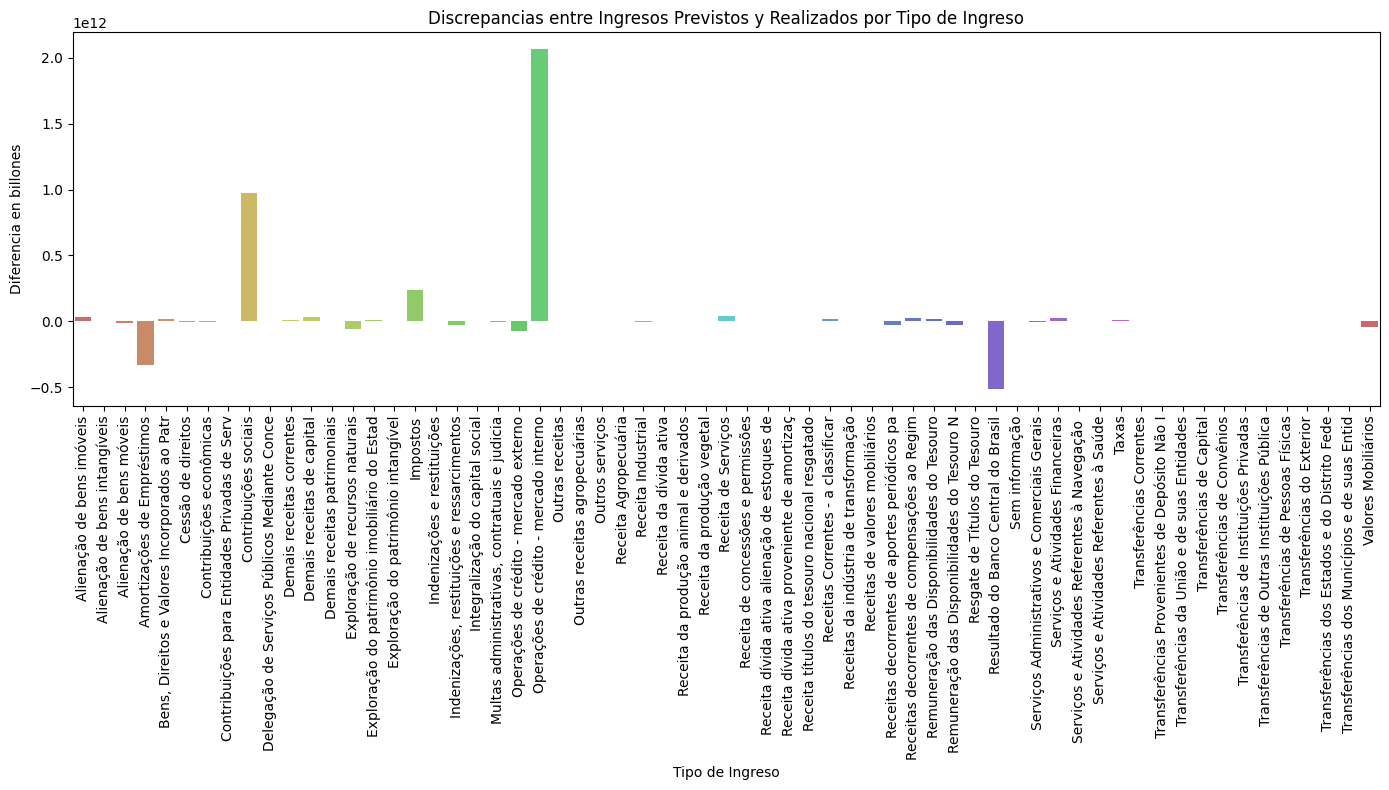

In [263]:
plt.figure(figsize=(14,8))
sns.barplot(x='TIPO DE INGRESO', y='Diferencia_Previsto_Realizado', data=diferencia_por_tipo_ingreso, palette="hls")
plt.title('Discrepancias entre Ingresos Previstos y Realizados por Tipo de Ingreso')
plt.xlabel('Tipo de Ingreso')
plt.xticks(rotation=90) 
plt.ylabel('Diferencia en billones')
plt.tight_layout()
plt.show()

Vamos a comparar ahora el total de los ingresos previstos, y realizados por Categoría Económica

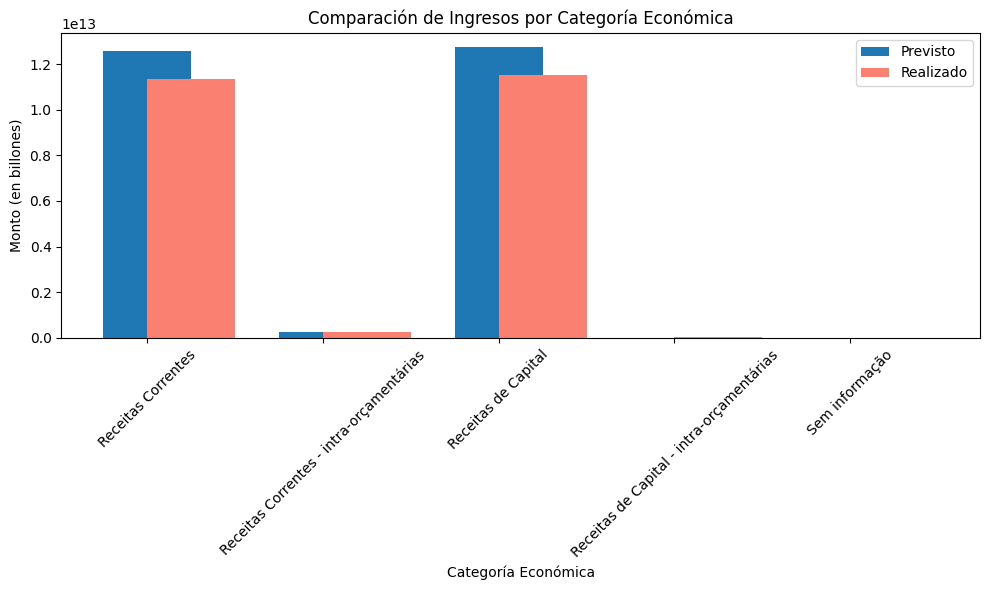

In [264]:
# Agrupar por categoría económica para obtener los valores de ingresos previstosy realizados
ingresos_por_categoria = df_limpio.groupby('CATEGORÍA ECONÓMICA').agg({'VALOR PREVISTO ACTUALIZADO': 'sum', 'VALOR LANZADO': 'sum', 'VALOR REALIZADO': 'sum'}).reset_index()

# Gráfico de barras para comparar ingresos previstos y realizados por categoría
plt.figure(figsize=(10,6))
ancho_barra = 0.5
categories = ingresos_por_categoria['CATEGORÍA ECONÓMICA']

plt.bar(categories, ingresos_por_categoria['VALOR PREVISTO ACTUALIZADO'], width=ancho_barra, label='Previsto', align='center')
plt.bar(categories, ingresos_por_categoria['VALOR REALIZADO'], width=ancho_barra, label='Realizado', align='edge', color='salmon')
plt.title('Comparación de Ingresos por Categoría Económica')
plt.xlabel('Categoría Económica')
plt.ylabel('Monto (en billones)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Por ultimo vamos a hacer un diagrama de cajas para evaluar la dispersion de la diferencia entre los valores realzados y previstos

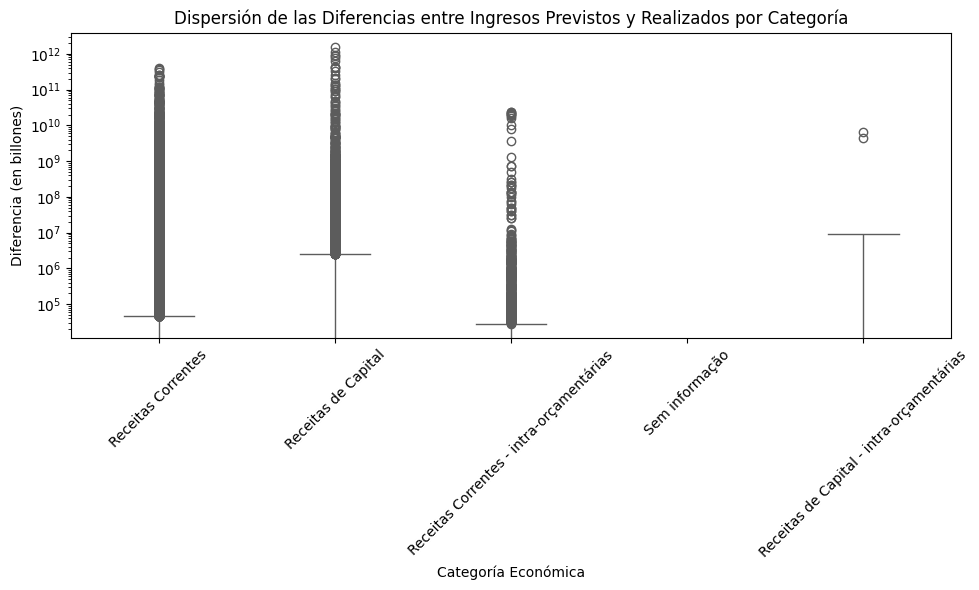

In [265]:
df_limpio['Diferencia_Previsto_Realizado'] = df_limpio['VALOR PREVISTO ACTUALIZADO'] - df_limpio['VALOR REALIZADO']

plt.figure(figsize=(10,6))

sns.boxplot(x='CATEGORÍA ECONÓMICA', y='Diferencia_Previsto_Realizado', data=df_limpio, palette="hls")

plt.title('Dispersión de las Diferencias entre Ingresos Previstos y Realizados por Categoría')
plt.xlabel('Categoría Económica')
plt.ylabel('Diferencia (en billones)')
plt.xticks(rotation=45)
# Aplicamos escala logarítmica al eje Y para mejorar la visibilidad de la gráfica
plt.yscale('log')

plt.tight_layout() 
plt.show()



El gráfico arroja una gran cantidad de valores atípicos lo que refleja una diferencia extrema entre los ingresos previstos y los realizados

CONCLUSIONES